# RHEOS Tutorials



In [1]:
using RHEOS

PyPlot needs to be installed to run these examples and display plots of the data.

In [2]:
using PyPlot

# Example 1

- Loading experimental data from csv file
- Fitting model
- Comparing original data with fit




┌ Warning: Please note that NaN data rows are not included in resultant data struct.
└ @ RHEOS /home/ab2425/.julia/dev/RHEOS/src/IO.jl:11
┌ Warning: Initial values for model parameters is set to [0.5, 0.5] by default
└ @ RHEOS /home/ab2425/.julia/dev/RHEOS/src/processing.jl:210


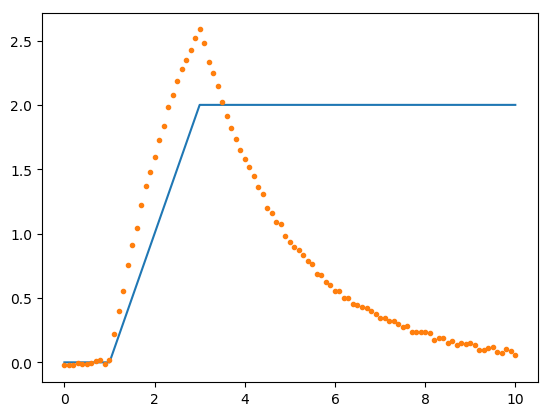

Time: 2.197644239 s, Why: XTOL_REACHED, Parameters: [4.0054, 2.003], Error: 0.022310985023644047



Model: maxwell

Parameter values: (η = 4.0054017305374146, k = 2.003000020980835) 

                ___
            _____| |________╱╲  ╱╲  ╱╲  ___
                _|_|          ╲╱  ╲╱  ╲╱
                  η                  k
               

In [3]:
using PyPlot

# Make sure the examples folder is the current directory
# check by typing "pwd()"

# Import data
data = importcsv("../examples/example1_data.csv", t_col=1, ϵ_col=2, σ_col=3)

# Plot data
plot(data.t,data.ϵ,"-")
plot(data.t,data.σ,".")

# We now fit a Standard Linear Solid model
maxwell_model = modelfit(data, Maxwell, strain_imposed)



Note that the fitting function requires guidance regarding the type of testing used.
It helps optimise the fitting process.

The data in this example is the stress response to a strain ramp followed by plateau.
It therefore corresponds to a strain imposed process.


We now want to calculate the stress values predicted by the model given the experimental strain data.
Lets create a new data set with the strain profile


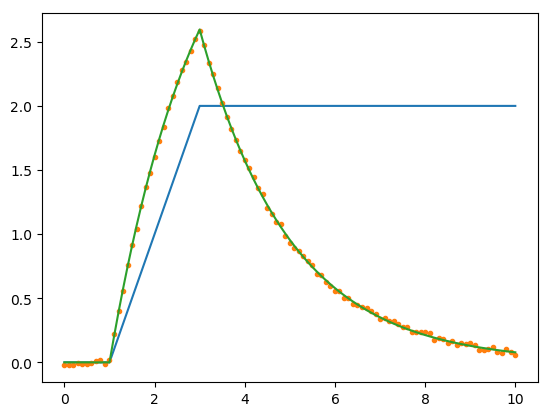

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbd66e44e80>

In [4]:

maxwell_predict = extract(data, strain_only)
# and calculate the stress based on the model
maxwell_predict = modelpredict(maxwell_predict, maxwell_model)
# Now we can plot data and model together for comparison

# Plot data
plot(data.t,data.ϵ,"-")
plot(data.t,data.σ,".")
plot(maxwell_predict.t,maxwell_predict.σ)



# Example 2

This script shows how to use RHEOS to explore the behaviour of various modeks
This involves:

- Creating a strain function
- Defining models based on parameter values


PyPlot needs to be installed to run these examples and display plots of the data.

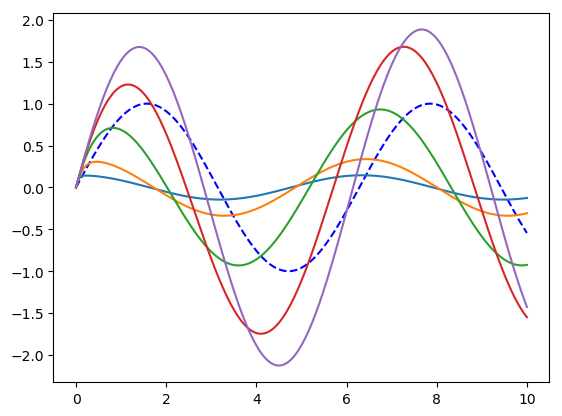

In [5]:

# Creates a time only dataset
dϵ=timeline()
# calculates strain data by applying a function of time
dϵ=strainfunction(dϵ,t->sin(t))

# Plot strain data
plot(dϵ.t,dϵ.ϵ,"--b")


# we can now simulate various models based on this strain only dataset
# Let's study the role of the dashpot strength in the MAxwell model
for η in [0.1, 0.3, 1, 3, 10]
    maxwell_model = RheoModel(Maxwell, k = 2., η = η)
    d_maxwell = modelpredict(dϵ, maxwell_model)
    plot(d_maxwell.t,d_maxwell.σ)
end
